# Writing
This notebook serves as an aid for the writing process. 
1. figure out a good outline for the implementation section 
2. create figures where helpful 


# Outline

Broadly the implementation consists of a balancing algorithm and a number of algorithms that allow this balancing algorithm to work. 

The implementation maniuplates the control flow graph 



In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 
    

/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/notebooks


In [2]:
%autoreload 2
import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.graph.control_flow_graph import ControlFlowGraph
# from rwtools.nemesis.graph.utils import get_root 
from rwtools.nemesis.graph.control_flow_graph import ControlFlowGraph
import networkx as nx


# Examples of problematic structures 


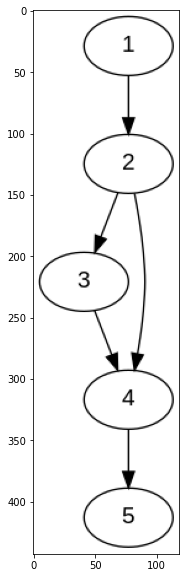

In [3]:
G = nx.DiGraph()

G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)
G.add_edge(4, 5)
# G.add_edge(3, 4)


fig, axs = plt.subplots(1, figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)
for n in [1, 2, 3, 4, 5]:
    P.get_node(str(n))[0].set_fontname("arial")

name = "optional"
P.write_png(f'{name}.png')

plt.imshow(mpimg.imread(f'{name}.png'))
# plt.imshow(nx.nx_pydot.to_pydot(G))

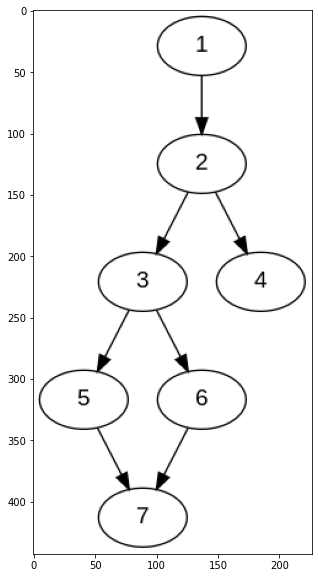

In [4]:
name = "unequal"
G = nx.DiGraph()

G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(2, 4)

G.add_edge(3, 5)
G.add_edge(3, 6)
G.add_edge(5, 7)
G.add_edge(6, 7)

# G.add_edge(3, 4)
# G.add_edge(4, 5)


fig, axs = plt.subplots(1, figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)

for n in [1, 2, 3, 4, 5, 6, 7]:
    P.get_node(str(n))[0].set_fontname("arial")

name = "unequal"
P.write_png(f'{name}.png')

axs.imshow(mpimg.imread(f'{name}.png'))

# plt.imshow(nx.nx_pydot.to_pydot(G))

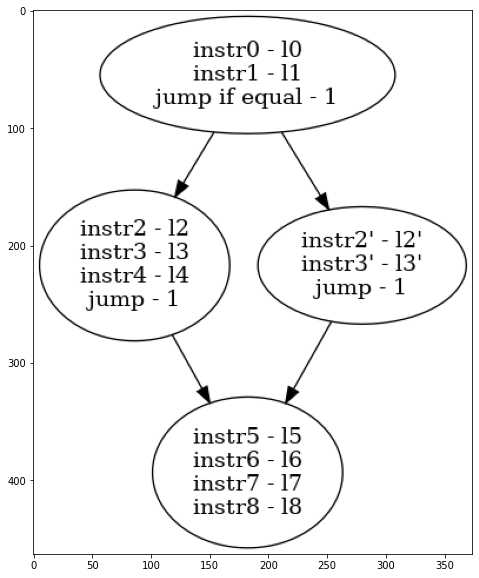

In [5]:
G = nx.DiGraph()

G.add_edge("start", 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, "end")
G.add_edge(3, 1)

fig, axs = plt.subplots(1,figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)

# name = "loop"
# P.write_png(f'{name}.png')

# axs[0].imshow(mpimg.imread(f'{name}.png'))

name = "graph_example"
G = nx.DiGraph()

n1 = "\n".join([f"instr{i} - l{i}" for i in range(2)] + [f"jump if equal - {1}"])
n2 = "\n".join([f"instr{i} - l{i}" for i in range(2, 5)] + ["jump - 1"])
n3 = "\n".join([f"instr{i}' - l{i}'" for i in range(2, 4)] + ["jump - 1"])
n4 = "\n".join(f"instr{i} - l{i}" for i in range(5, 9))

G.add_edge(n1, n2)
G.add_edge(n1, n3)
G.add_edge(n2, n4)
G.add_edge(n3, n4)

P = nx.nx_pydot.to_pydot(G)
P.write_png(f'{name}.png')


axs.imshow(mpimg.imread(f'{name}.png'))

# plt.imshow(nx.nx_pydot.to_pydot(G))

# Illustration of extracting subgraph 
example of how the then else regions of a graph are determined 

strict digraph  {
1 [color=limegreen, fontname=arial, penwidth=3];
2 [color=red, fontname=arial, penwidth=3];
3 [color=blue, fontname=arial, penwidth=3];
4 [color=blue, fontname=arial, penwidth=3];
5 [color=blue, fontname=arial, penwidth=3];
6 [color=blue, fontname=arial, penwidth=3];
7 [color=blue, fontname=arial, penwidth=3];
8 [color=blue, fontname=arial, penwidth=3];
1 -> 2;
1 -> 3;
3 -> 4;
3 -> 5;
4 -> 6;
5 -> 6;
6 -> 7;
6 -> 8;
}



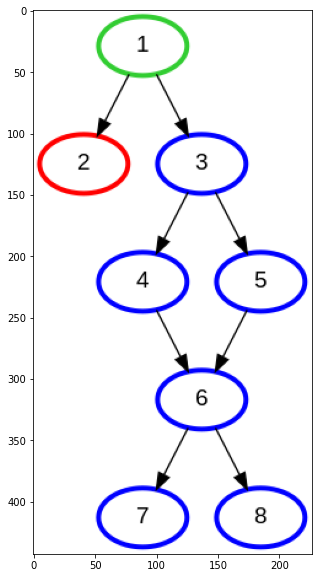

In [6]:
G = nx.DiGraph()
name = "nemesis-property-example-1"

G.add_edge('1', '2')
G.add_edge('1', '3')
G.add_edge('3', '4')
G.add_edge('3', '5')
G.add_edge('4', '6')
G.add_edge('5', '6')
G.add_edge('6', '7')
G.add_edge('6', '8')

# G.add_edge()
fig, axs = plt.subplots(1,figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)


P.get_node('1')[0].set_color("limegreen")
P.get_node('1')[0].set_penwidth(3)
P.get_node('1')[0].set_fontname('arial')


P.get_node('2')[0].set_color("red")
P.get_node('2')[0].set_penwidth(3)
P.get_node('2')[0].set_fontname('arial')

 
for i in [3,4,5,6,7, 8]:
    P.get_node(str(i))[0].set_color('blue')
    P.get_node(str(i))[0].set_penwidth(3)
    P.get_node(str(i))[0].set_fontname('arial')

P.write_png(f'{name}.png')
axs.imshow(mpimg.imread(f'{name}.png'))


print(P)


strict digraph  {
1;
2;
3 [color=limegreen, fontname=arial, penwidth=3];
4 [color=red, fontname=arial, penwidth=3];
5 [color=blue, fontname=arial, penwidth=3];
6 [color=purple, fontname=arial, penwidth=3];
7;
8;
1 -> 2;
1 -> 3;
3 -> 4;
3 -> 5;
4 -> 6;
5 -> 6;
6 -> 7;
6 -> 8;
}



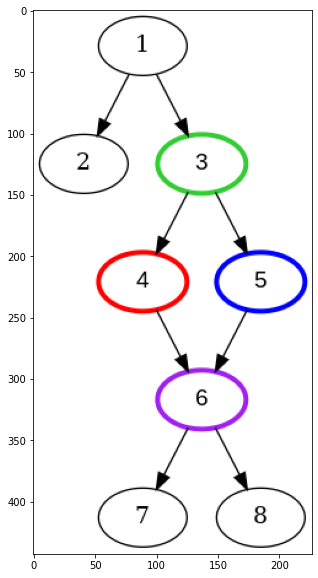

In [7]:
G = nx.DiGraph()
name = "nemesis-property-example-2"

G.add_edge('1', '2')
G.add_edge('1', '3')
G.add_edge('3', '4')
G.add_edge('3', '5')
G.add_edge('4', '6')
G.add_edge('5', '6')
G.add_edge('6', '7')
G.add_edge('6', '8')

# G.add_edge()
fig, axs = plt.subplots(1,figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)


P.get_node('3')[0].set_color("limegreen")
P.get_node('3')[0].set_penwidth(3)
P.get_node('3')[0].set_fontname('arial')

P.get_node('4')[0].set_color("red")
P.get_node('4')[0].set_penwidth(3)
P.get_node('4')[0].set_fontname('arial')


P.get_node('5')[0].set_color("blue")
P.get_node('5')[0].set_penwidth(3)
P.get_node('5')[0].set_fontname('arial')

P.get_node('6')[0].set_color("purple")
P.get_node('6')[0].set_penwidth(3)
P.get_node('6')[0].set_fontname('arial')

# P.get_node('2')[0].set_color("blue")
# P.get_node('2')[0].set_penwidth(3)
# P.get_node('2')[0].set_fontname('arial')

 
# for i in [3,4,5,6,7]:
#     P.get_node(str(i))[0].set_color('darkgreen')
#     P.get_node(str(i))[0].set_penwidth(3)
#     P.get_node(str(i))[0].set_fontname('arial')

P.write_png(f'{name}.png')
axs.imshow(mpimg.imread(f'{name}.png'))


print(P)


# Example of inserting nodes to equalize path lengths 


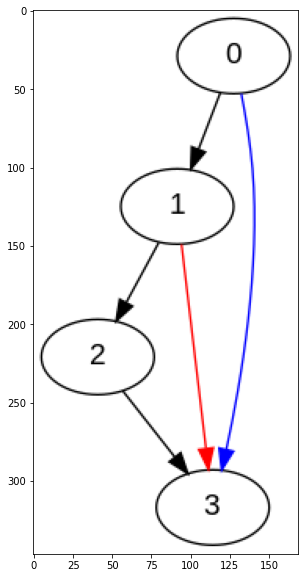

In [8]:
G = nx.DiGraph()

G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(0, 3)

# G.add_edge(3, 4)
# G.add_edge(3, 4)


fig, axs = plt.subplots(1, figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)

for n in range(4):
    P.get_node(str(n))[0].set_fontname("arial")


P.get_edge(str(1), dst = str(3))[0].set_color("red")
P.get_edge(str(0), dst = str(3))[0].set_color("blue")

# P.get_edge(str(0), str(1))[0].set_label(1)    
# P.get_edge(str(1), str(2))[0].set_label(1)  
# P.get_edge(str(2), str(3))[0].set_label(1)  

# P.get_edge(str(0), str(3))[0].set_label(3)  
# P.get_edge(str(1), str(3))[0].set_label(2)  


name = "equalize_paths_1"



P.write_png(f'{name}.png')

plt.imshow(mpimg.imread(f'{name}.png'))


# plt.imshow(nx.nx_pydot.to_pydot(G))

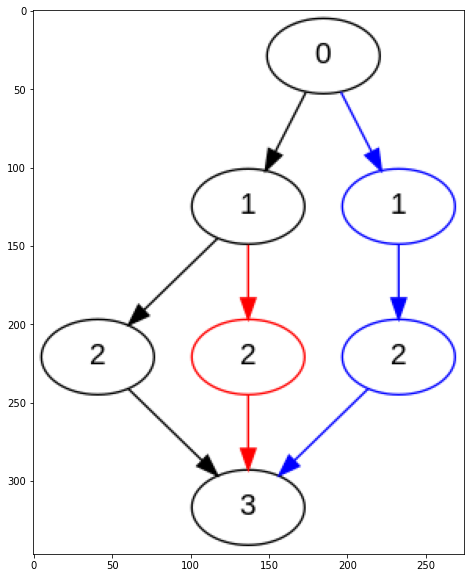

In [9]:
G = nx.DiGraph()

G.add_edge(0, 1)
G.add_edge(1, 2)

G.add_edge(2, 3)
G.add_edge(0, 4)
G.add_edge(4, 5)
G.add_edge(5, 3)

G.add_edge(1, 6)
G.add_edge(6, 3)
# G.add_edge(3, 4)
# G.add_edge(3, 4)


fig, axs = plt.subplots(1, figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)

for n in range(7):
    P.get_node(str(n))[0].set_fontname("arial")

labels_dict = {
0 : 0, 
1: 1, 
4:1, 
2:2,
6:2, 
    
5:2, 
    
3:3,
}

P.get_edge(str(1), dst = str(6))[0].set_color("red")
P.get_edge(str(6), dst = str(3))[0].set_color("red")


P.get_node(str(6))[0].set_color("red")


P.get_edge(str(0), dst = str(4))[0].set_color("blue")
P.get_edge(str(4), dst = str(5))[0].set_color("blue")
P.get_edge(str(5), dst = str(3))[0].set_color("blue")

P.get_node(str(4))[0].set_color("blue")
P.get_node(str(5))[0].set_color("blue")


for key, value in labels_dict.items(): 
    P.get_node(str(key))[0].set_label(str(value))

name = "equalize_paths_2"


P.write_png(f'{name}.png')

plt.imshow(mpimg.imread(f'{name}.png'))


# plt.imshow(nx.nx_pydot.to_pydot(G))

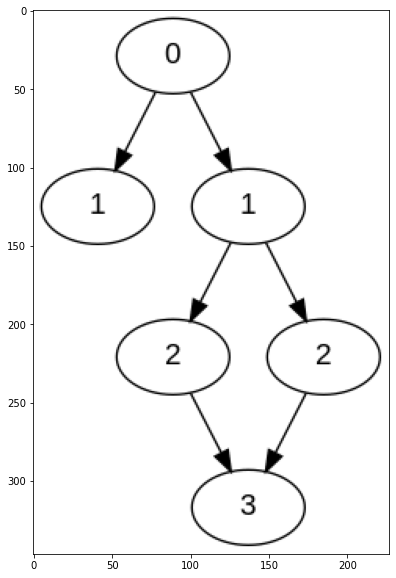

In [10]:
G = nx.DiGraph()


G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(2, 3)
G.add_edge(2, 4)

G.add_edge(3, 5)
G.add_edge(4, 5)

P = nx.nx_pydot.to_pydot(G)

for n in range(6):
    P.get_node(str(n))[0].set_fontname("arial")

labels_dict = {
0 : 0, 
1: 1, 
2:1, 
3:2,
4:2, 
    
5:3, 
}

for key, value in labels_dict.items(): 
    P.get_node(str(key))[0].set_label(str(value))
    
# G.add_edge()
fig, axs = plt.subplots(1,figsize=(10, 10))

name = "equalize_branches_example-1"
P.write_png(f'{name}.png')
axs.imshow(mpimg.imread(f'{name}.png'))




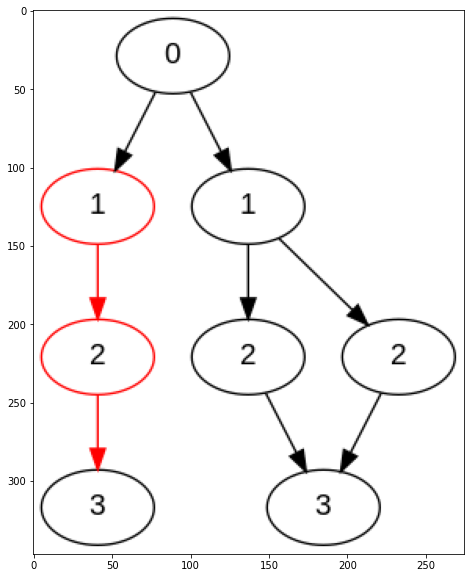

In [11]:
G = nx.DiGraph()


G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(2, 3)
G.add_edge(2, 4)

G.add_edge(3, 5)
G.add_edge(4, 5)

G.add_edge(1, 6)

G.add_edge(6, 7)

P = nx.nx_pydot.to_pydot(G)

for n in range(8):
    P.get_node(str(n))[0].set_fontname("arial")

labels_dict = {
0 : 0, 
1: 1, 
2:1, 
    
3:2,
4:2, 
6:2, 
    
5:3,
7:3
}

P.get_edge(str(1), str(6))[0].set_color("red")
P.get_edge(str(6), str(7))[0].set_color("red")

P.get_node(str(6))[0].set_color("red")
P.get_node(str(1))[0].set_color("red")

for key, value in labels_dict.items(): 
    P.get_node(str(key))[0].set_label(str(value))

# G.add_edge()
fig, axs = plt.subplots(1,figsize=(10, 10))

name = "equalize_branches_example-2"
P.write_png(f'{name}.png')
axs.imshow(mpimg.imread(f'{name}.png'))




# example aligning nodes


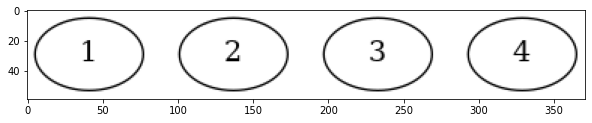

In [21]:
G = nx.DiGraph()

G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

P = nx.nx_pydot.to_pydot(G)

name = "align-example-2"
P.write_png(f'{name}.png')
# G.add_edge()
fig, axs = plt.subplots(1,figsize=(10, 10))

axs.imshow(mpimg.imread(f'{name}.png'))
